In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
U = 1.0*np.array([1,5,9])
X = 1.0*np.array([-1,0,1,2,3,4,5,6,7,8,9,10,11])

def k(X1,X2,ls=4):
    res = np.zeros([len(X1),len(X2)])
    for i1,x1 in enumerate(X1):
        for i2,x2 in enumerate(X2):
            res[i1,i2] = np.exp((-(x1-x2)**2)/(ls*2))
    return res

In [91]:
kuf = k(U,X)
kfu = kuf.T
kuu = k(U,U)
Sigma = np.linalg.inv(kuu + kuf @ kfu)

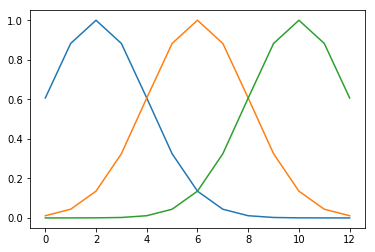

In [92]:
plt.plot(kfu)

In [93]:
res[:,i+j*len(U)]

array([1.07352778e-03, 9.55611805e-04, 5.84575949e-04, 1.32091829e-04,
       5.89512549e-05, 1.04725963e-03, 3.48804109e-03, 6.73468728e-03,
       9.10545769e-03, 8.92461078e-03, 5.71175102e-03, 1.25675654e-03,
       7.77100208e-04, 1.24482908e-02, 4.18493754e-02, 8.43323135e-02,
       1.26845567e-01, 1.57880414e-01, 1.72232437e-01, 1.69260416e-01,
       1.50738062e-01, 1.20585565e-01, 8.52349412e-02, 5.23965857e-02,
       2.77834005e-02, 1.27204032e-02, 5.06035703e-03, 1.76089065e-03,
       5.38483290e-04, 1.45070789e-04, 3.44691557e-05, 7.22608621e-06,
       1.33677222e-06, 2.18229041e-07, 3.14394543e-08, 3.99712216e-09,
       4.48467667e-10, 4.44044917e-11, 3.88003075e-12, 2.99196289e-13])

Text(0.5, 1.0, '$(\\Sigma k_{ug} k_{gu} \\Sigma)(1+k_{gu}\\Sigma k_{ug})^{-1}$')

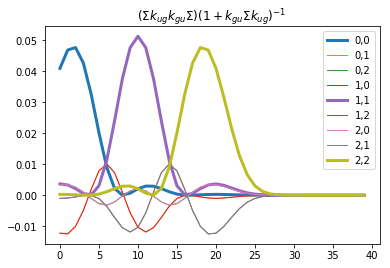

In [118]:
res = []
res2 = []
res_den = []
res_num = []
for g in np.arange(0,20,0.5):
    g = np.array([g])
    kug = k(U,g)
    kgu = kug.T
    result = (Sigma @ kug @ kgu @ Sigma)/(1+kgu @ Sigma @ kug)
    result_den = (1+kgu @ Sigma @ kug)
    result_num = (Sigma @ kug @ kgu @ Sigma)
    res.append(result)
    res2.append(Sigma @ kug)
    res_den.append(result_den)
    res_num.append(result_num)
res = np.array(np.array(res))
res_num = np.array(res_num)
res = res.reshape(len(res),len(U)**2)
res_den = np.array(res_den)
res_num = res_num.reshape(len(res_num),len(U)**2)


for i in range(len(U)):
    for j in range(len(U)):
        if i==j: 
            lw=3
        else:
            lw=1
        plt.plot(res[:,i+j*len(U)],label="%d,%d" % (i,j),lw=lw)
plt.legend()
plt.title('$(\Sigma k_{ug} k_{gu} \Sigma)(1+k_{gu}\Sigma k_{ug})^{-1}$')

This is the difficult function to bound. What's the denominator?

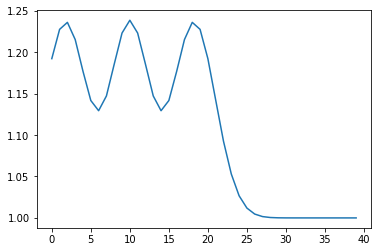

In [119]:
plt.plot(res_den[:,0])

So this isn't a small value because of a big denominator... Thus we could just assume it is greater than one, and focus on the numerator.

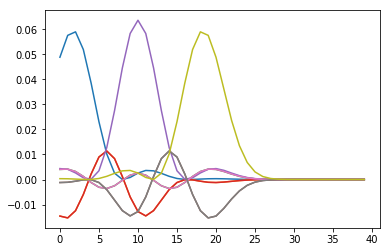

In [123]:
plt.plot(res_num)

In [121]:
res2=np.array(res2)
res2=res2.reshape(res2.shape[0],res2.shape[1])

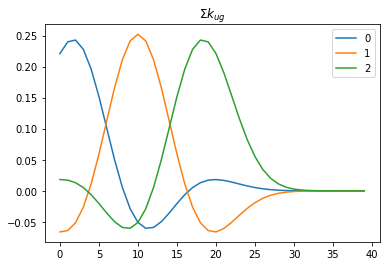

In [122]:
for i in range(res2.shape[1]):
    plt.plot(res2[:,i],label=i)
plt.title('$\Sigma k_{ug}$')
plt.legend()

We can find the above peaks by using my bound-on-RBFs method.

In [97]:
kuf@np.ones(len(X))

array([4.49565555, 5.00812249, 4.49565555])

We want to find a bound on $(y_* - y_*')^\top M^{-1}(y_* - y_*')$

$y_* = K_{*u} \Sigma K_{uf} \mathbf{y}$
$y_*' = K_{*u} \Sigma' K_{uf}' \mathbf{y}'$

Where $\Sigma = (K_{uu} + K_{uf} K_{fu})^{-1}$

We assume we add a new training point, at some location x', with value z. So we consider a new covariance vector $\mathbf{k}_{ug}$ to be the covariance between the inducing points and this new training point.

Using Sherman-Morrison we can then write $y_*'$ as:

$y_* - y_*' = K_{*u} \Sigma K_{uf} \mathbf{y} - K_{*u} \left[\Sigma - \frac{\Sigma \mathbf{k}_{ug} \mathbf{k}_{gu} \Sigma}{1+\mathbf{k}_{gu} \Sigma \mathbf{k}_{ug}} \right] \left[K_{uf} \mathbf{y} + \mathbf{k}_{ug} z\right]$

Partly multiplying out the product and cancelling the first term. We also note that the denominator is never less than one (PROVE THIS!).

$y_* - y_*' = K_{*u} \left(\Sigma K_{uf} \mathbf{y} - \Sigma K_{uf} \mathbf{y} - \Sigma \mathbf{k}_{ug} z +  \left[ \frac{\Sigma \mathbf{k}_{ug} \mathbf{k}_{gu} \Sigma}{1+\mathbf{k}_{gu} \Sigma \mathbf{k}_{ug}} \right] \left[K_{uf} \mathbf{y} + \mathbf{k}_{ug} z\right]\right)$

$y_* - y_*' \leq K_{*u} \left(\left[ \Sigma \mathbf{k}_{ug} \mathbf{k}_{gu} \Sigma \right] \left[K_{uf} \mathbf{y} + \mathbf{k}_{ug} z\right] - \Sigma \mathbf{k}_{ug} z\right)$

We can find an upper bound on $\Sigma K_{ug}$ using our bounds-on-EQs method, as this is equivalent to a weighted sum, with unknown new location $g$. We pick each row of $\Sigma$ to be the worst case (depending on our constraints on where the training points should lie). Let $\mathbf{a}$ be an upper bound on $\Sigma K_{ug}$, i.e. each term of $\mathbf{a}_i \geq \left[\Sigma K_{ug}\right]_i$

TO DO: PROVE THAT THE MAXIMUM FOR A GIVEN ROW IN K IS ACHIEVED IN A PARTICULAR WAY

We can then find an upper bound on each term in the $u \times u$ matrix formed by the outer product of $\mathbf{a} \mathbf{a}^\top$.

We also can bound $K_{uf} \mathbf{y} + \mathbf{k}_{ug} z$ by just placing them in the worst case positions permitted for each of the $u$ elements. I.e. the locations that will maximimse the result. We don't know what $\mathbf{y}$ is or $z$ so we allow them to be $\pm \Delta y$, which is a bound on the values training point outputs can take.

So for example, for $u_1$, we have a rule that a given number of training points may lie near each inducing point, etc, this lets us put a bound on the expression, for each inducing input.

Can we ignore the negative term?

$K_{*u}$ is known.

So we are left with an upper bound on the rest, which we will call $w$: $y_* - y_*' = K_{*u} \mathbf{w}$.

So

$(y_* - y_*')^\top M^{-1}(y_* - y_*') \leq K_{*u} \mathbf{w} M^{-1} \mathbf{w}^\top K_{*u}^\top$

We can use the cloaking method on this expression to find $M$.

TO DO: I MIGHT HAVE ASSUMED SOME VALUES ARE NOT NEGATIVE. OR SOMETHING. NEED TO GO THROUGH AND PROVE PROPERLY.